# The Project Of Making A Handwritten Digits Classifier
The project has been prepared by Aliaksandr Varonin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

Our first step would be bringing in the main research dataset pre-loaded with the scikit-learn library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset.

In [2]:
digits = load_digits()

data = pd.DataFrame(digits['data'])
target = pd.Series(digits['target'])

shuffled_index = np.random.permutation(data.index)
data = data.loc[shuffled_index]
target = target.loc[shuffled_index]

data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1358,0.0,0.0,7.0,16.0,16.0,10.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,7.0,16.0,16.0,11.0,1.0,0.0
1238,0.0,1.0,13.0,16.0,16.0,12.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,15.0,3.0,0.0,0.0,0.0,0.0
1237,0.0,0.0,3.0,16.0,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,14.0,0.0,0.0,0.0
1440,0.0,2.0,6.0,10.0,12.0,1.0,0.0,0.0,0.0,14.0,...,10.0,0.0,0.0,0.0,5.0,16.0,16.0,14.0,1.0,0.0
1133,0.0,0.0,1.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,1.0,12.0,15.0,14.0,6.0,0.0


In order to illustrate how the process of vizualizing the image from the dataframe looks like, we would perform the following code down the cell. As a result we would observe a zero number.

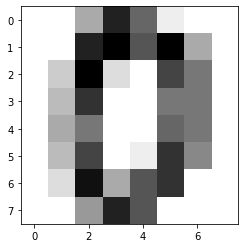

In [3]:
first_image = data.loc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

Now that the data is in the right shape, we can visualize it using **pyplot.imshow()** function.
To display multiple images in one matplotlib figure, we can use the equivalent **axes.imshow()** function. 

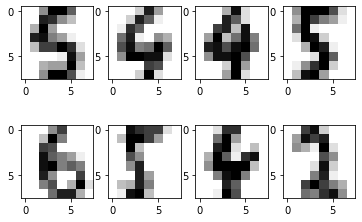

In [4]:
fig, axarr = plt.subplots(2,4)

axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0,1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axarr[0,2].imshow(data.iloc[200].values.reshape(8,8), cmap="gray_r")
axarr[0,3].imshow(data.iloc[300].values.reshape(8,8), cmap="gray_r")

axarr[1,0].imshow(data.iloc[1000].values.reshape(8,8), cmap="gray_r")
axarr[1,1].imshow(data.iloc[1100].values.reshape(8,8), cmap="gray_r")
axarr[1,2].imshow(data.iloc[1200].values.reshape(8,8), cmap="gray_r")
axarr[1,3].imshow(data.iloc[1300].values.reshape(8,8), cmap="gray_r")

# K-Nearest Neighbors model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the **k-nearest neighbors algorithm** make no such assumption. This allows it to capture nonlinearity in the data.

**We will set up a pipeline for training and testing k-nn models.**

In [5]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

def train_knn(neighbors, train_features, train_target):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(train_features, train_target)
    return model

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['true_label'] = test_target
    train_test_df['predicted_label'] = predictions
    correct_mask = train_test_df['predicted_label'] == train_test_df['true_label']
    overall_accuracy = sum(correct_mask)/len(train_test_df)
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=1, shuffle = True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_knn(k, train_features, train_target)
        overall_accuracy = test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

As the algorithm is ready, let's put it into action. We would go though the process 10 times (*10 k-values*) as the range points out in the next cell.

Text(0.5, 1.0, 'Mean accuracy vs. K values')

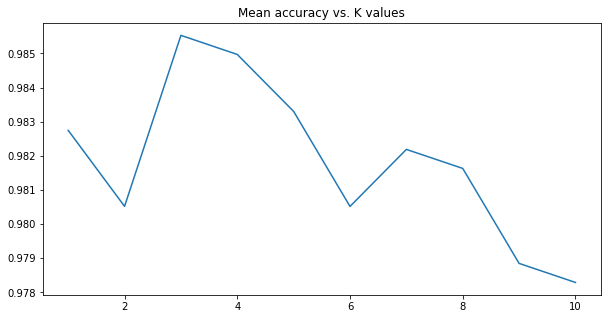

In [6]:
k_values = list(range(1,11))
k_accuracies = []

for k in k_values:
    k_accuracy = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracy)
    k_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(10,5))
plt.plot(k_values, k_accuracies)
plt.title("Mean accuracy vs. K values")

There's a **negative correlation** between *k values* and *mean_accuracy*. We can observe a spike at 3 neighbors at the plot but anyway the highest mean accuracy is at the beginning with just *one neighbor*.

We've already seen how the **KNeighborsClassifier** helped us in image classification, now let's perform a **neural network** with *one hidden layer* for a start.

# Neural network with one hidden layer

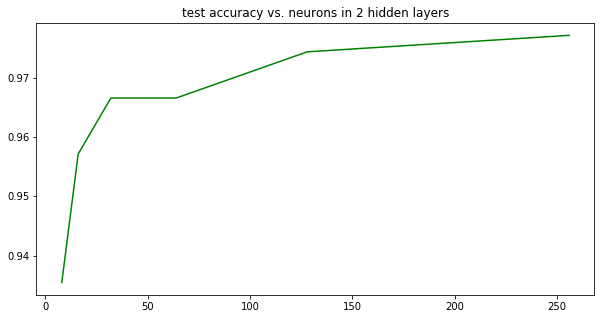

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
          ]

mean_test_acc = []

for n in neurons:
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=1000)
        mlp.fit(train_features, train_target)
        
        predictions = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, predictions)
        test_accuracies.append(test_acc)
    
    mean_test_acc.append(np.mean(test_accuracies))


plt.figure(figsize=(10,5))
plt.title("test accuracy vs. neurons in 2 hidden layers")
x = [i[0] for i in neurons]
plt.plot(x, mean_test_acc, color='green')

The **test accuracy** increases with each neuron and we increase the accuracy from *0.93* to *0.975*. The **K-Nearest neighbors model** got an accuracy of *0.985* that is higher than current neural network perfomance.

The only problem so far is that we don't have tne information about true or false positives and true or false negatives.

# Neural network with 2 hidden layers

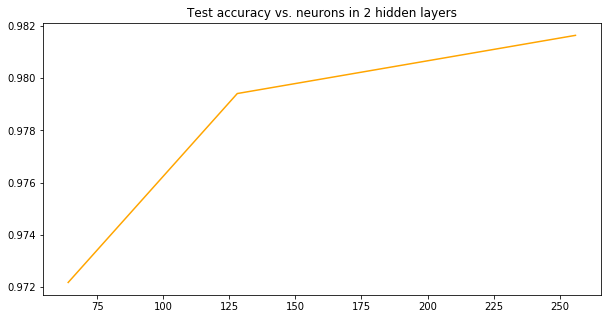

In [8]:
neurons = [
    (64, 64),
    (128, 128),
    (256, 256)
          ]

mean_test_acc = []

for n in neurons:
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=1000)
        mlp.fit(train_features, train_target)
        
        predictions = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, predictions)
        test_accuracies.append(test_acc)
    
    mean_test_acc.append(np.mean(test_accuracies))
        
        
plt.figure(figsize=(10,5))
plt.title("Test accuracy vs. neurons in 2 hidden layers")
x = [i[0] for i in neurons]
plt.plot(x, mean_test_acc, color='orange')

Having **2 hidden layers** in our network, the test accuracy increases from *0.97* till *0.982* that is still lower but very close to **K-Nearest Neighbors model**.

# Neural network with 3 hidden layers

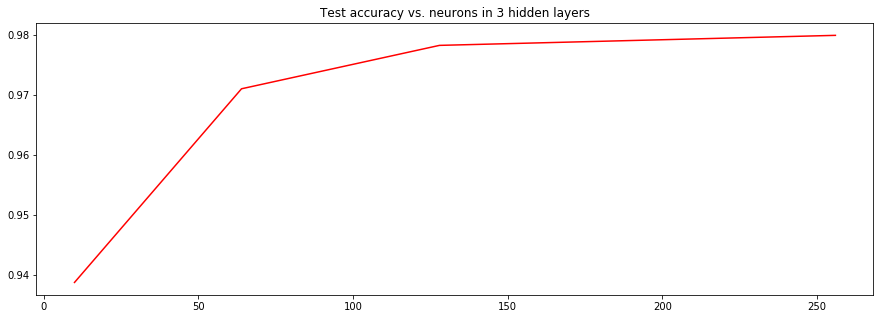

In [11]:
neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128),
    (256, 256, 256)
          ]

mean_test_acc = []

for n in neurons:
    test_accuracies = []
    kf = KFold(n_splits=4)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = target.iloc[train_index], target.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=1000)
        mlp.fit(train_features, train_target)
        
        predictions = mlp.predict(test_features)
        test_acc = accuracy_score(test_target, predictions)
        test_accuracies.append(test_acc)
    
    mean_test_acc.append(np.mean(test_accuracies))
        
        
plt.figure(figsize=(15,5))
plt.title("Test accuracy vs. neurons in 3 hidden layers")
x = [i[0] for i in neurons]
plt.plot(x, mean_test_acc, color='red')

Having **three hidden layers**, the test accuracy increases from *0.94* till *0.98*. Current model show better perfomance than previous one with one layer and a bit worse than one with 2 layers. Basically the rule says that the more hidden layers we include in our neural network, the more accuracy score we obtain, although in this research work we showed that this is not always true.

# Summary

In this reseach project we have showed the difference in perfomance in **image classification tasks** between **neural networks** and **K-nn classification models**. Also we compared how the number and size of the hidden layers influence on the overall effectiveness of neural networks.

Classifying simple digits is slightly better perfomed with K-nn model than with neural networks with 1, 2 or 3 **hidden layers**. This algorithm allows it to capture nonlinearity in the data. Both neural networks and k-nn models are great for image classification tasks and can be used interchangeably.